In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

'Colab Notebooks'   hyderabad_projects	'Real Estate'
 glove		    project		 toronto-emotional-speech-set-tess.zip


In [3]:
!unzip "/content/drive/MyDrive/toronto-emotional-speech-set-tess.zip"

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [4]:
!ls

 drive	      'tess toronto emotional speech set data'
 sample_data  'TESS Toronto emotional speech set data'


In [131]:
#speech feature extraction
import librosa
import numpy as np
import os

DATA_PATH = "TESS Toronto emotional speech set data"

features = []
labels = []

for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        # Load audio
        audio, sr = librosa.load(file_path, sr=16000)

        # Trim silence
        audio = librosa.effects.trim(audio)[0]

        # Extract MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfcc = np.mean(mfcc.T, axis=0)

        features.append(mfcc)
        labels.append(folder)

print("Total samples:", len(features))

Total samples: 2800


In [132]:
#preparing data for training
X = np.array(features)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)

print("Shape of X:", X.shape)
print("Number of classes:", len(le.classes_))

Shape of X: (2800, 40)
Number of classes: 14


In [133]:
#fixing labels to 7 classes
labels.append(folder)

In [134]:
emotion = folder.split("_")[1]   # extract only emotion
labels.append(emotion)

In [135]:
features = []
labels = []

for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)

    emotion = folder.split("_")[1]  # Extract only emotion

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        audio, sr = librosa.load(file_path, sr=16000)
        audio = librosa.effects.trim(audio)[0]

        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfcc = np.mean(mfcc.T, axis=0)

        features.append(mfcc)
        labels.append(emotion)

print("Total samples:", len(features))

Total samples: 2800


In [136]:
X = np.array(features)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)

print("Shape of X:", X.shape)
print("Number of classes:", len(le.classes_))
print("Classes:", le.classes_)

Shape of X: (2800, 40)
Number of classes: 10
Classes: ['Fear' 'Pleasant' 'Sad' 'angry' 'disgust' 'fear' 'happy' 'neutral'
 'pleasant' 'sad']


In [137]:
# i haveduplicate classes so.....
features = []
labels = []

for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)

    emotion = folder.split("_")[1].lower()  # 👈 convert to lowercase

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        audio, sr = librosa.load(file_path, sr=16000)
        audio = librosa.effects.trim(audio)[0]

        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfcc = np.mean(mfcc.T, axis=0)

        features.append(mfcc)
        labels.append(emotion)

print("Total samples:", len(features))

Total samples: 2800


In [138]:
X = np.array(features)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)

print("Shape of X:", X.shape)
print("Number of classes:", len(le.classes_))
print("Classes:", le.classes_)

Shape of X: (2800, 40)
Number of classes: 7
Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'pleasant' 'sad']


In [139]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps class balance
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2240
Testing samples: 560


In [140]:
#since features =(40,), we use dense network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(40,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,959 (54.53 KB)

 Trainable params: 13,959 (54.53 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
#train the model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1593 - loss: 31.0172 - val_accuracy: 0.2232 - val_loss: 1.7660
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2363 - loss: 4.2276 - val_accuracy: 0.1473 - val_loss: 1.9452
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2031 - loss: 2.3103 - val_accuracy: 0.1562 - val_loss: 1.9411
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2050 - loss: 2.0343 - val_accuracy: 0.2723 - val_loss: 1.8399
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2296 - loss: 1.8906 - val_accuracy: 0.2902 - val_loss: 1.7830
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2505 - loss: 1.8434 - val_accuracy: 0.3393 - val_loss: 1.7223
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2706 - loss: 1.7521 - val_accuracy: 0.3616 - val_loss: 1.5862
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3018 - loss: 1.7166 - val_accuracy: 0.3839 - val_los

In [147]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Speech Model Test Accuracy:", test_accuracy)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.2885 
Speech Model Test Accuracy: 0.9624999761581421


In [149]:
print(test_accuracy)

0.9624999761581421


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


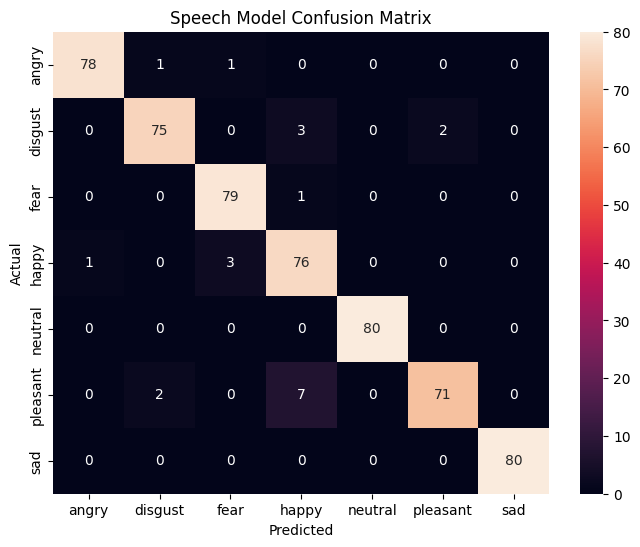

In [143]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Speech Model Confusion Matrix")
plt.show()


In [115]:
import os

DATA_PATH = "TESS Toronto emotional speech set data"   # change if needed

texts = []
labels = []

for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)

    # Extract the true emotion from the folder name (e.g., 'angry' from 'OAF_angry')
    true_emotion = folder.split("_")[1].lower()

    for file in os.listdir(folder_path):
        # Extract the spoken word from the filename (e.g., 'back' from 'OAF_back_angry.wav')
        # The file format is typically SUBJECT_WORD_EMOTION.wav, so the word is at index 1.
        parts = file.replace(".wav", "").split("_")
        spoken_word = parts[1]

        sentence = f"The speaker says the word {spoken_word} with {true_emotion} emotion."

        texts.append(sentence)
        labels.append(true_emotion) # Append the emotion derived from the folder name

print("Total samples:", len(texts))
print("Example:", texts[0], labels[0])

Total samples: 2800
Example: The speaker says the word cab with pleasant emotion. pleasant


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(labels)

print("Classes:", le.classes_)


Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']


In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

max_len = 10
X_text = pad_sequences(sequences, maxlen=max_len)

vocab_size = len(tokenizer.word_index) + 1

print("Vocabulary size:", vocab_size)
print("Max index:", X_text.max())


Vocabulary size: 11
Max index: 10


In [96]:
from sklearn.model_selection import train_test_split

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)


In [97]:
X_train_t = X_train_t.astype("int32")
X_test_t = X_test_t.astype("int32")

y_train_t = y_train_t.astype("int32")
y_test_t = y_test_t.astype("int32")


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model_text = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=128,
        input_length=X_train_t.shape[1]   # IMPORTANT
    ),

    Bidirectional(LSTM(64)),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(len(le.classes_), activation='softmax')
])


model_text.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_text.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [100]:
model_text.build(input_shape=(None, X_train_t.shape[1]))
model_text.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 10, 128)        │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,935 (425.53 KB)

 Trainable params: 108,935 (425.53 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
history = model_text.fit(
    X_train_t,
    y_train_t,
    validation_data=(X_test_t, y_test_t),
    epochs=10,
    batch_size=32
)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5030 - loss: 1.7166 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9997 - loss: 0.0279 - val_accuracy: 1.0000 - val_loss: 3.1771e-04
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9999 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.0309e-04
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 3.4281e-05
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 1.7762e-05
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 8.5047e-04 - val_accuracy: 1.0000 - val_loss: 9.9284e-06
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.9822e-06
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 8.747

In [102]:
loss, acc_text = model_text.evaluate(X_test_t, y_test_t)
print("Text Model Accuracy:", acc_text)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 2.6025e-06
Text Model Accuracy: 1.0


In [110]:
#Confusion Matrix — Text Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred_text = model_text.predict(X_test_t)

# Convert probabilities → class labels
y_pred_text = np.argmax(y_pred_text, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


<Figure size 600x600 with 0 Axes>

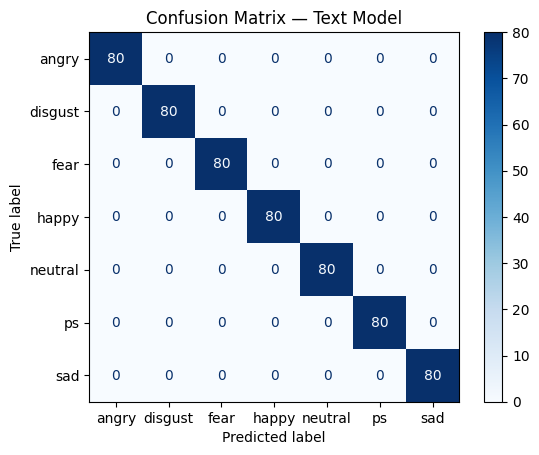

In [111]:
cm_text = confusion_matrix(y_test_t, y_pred_text)

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_text,
                              display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix — Text Model")
plt.show()


FUSION MODEL

In [105]:
from sklearn.model_selection import train_test_split

X_audio_train, X_audio_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X, X_text, y, test_size=0.2, random_state=42
)

In [106]:
#concatenate features
X_text_train_flat = X_text_train.reshape(X_text_train.shape[0], -1)
X_text_test_flat = X_text_test.reshape(X_text_test.shape[0], -1)

X_train_fusion = np.concatenate([X_audio_train, X_text_train_flat], axis=1)
X_test_fusion = np.concatenate([X_audio_test, X_text_test_flat], axis=1)


In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_fusion = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_fusion.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),

    Dense(len(le.classes_), activation='softmax')
])

model_fusion.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
history = model_fusion.fit(
    X_train_fusion,
    y_train,
    validation_data=(X_test_fusion, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1796 - loss: 29.0477 - val_accuracy: 0.6357 - val_loss: 2.3836
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4030 - loss: 6.1830 - val_accuracy: 0.8054 - val_loss: 0.5841
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5928 - loss: 2.7213 - val_accuracy: 0.8143 - val_loss: 0.5939
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6904 - loss: 1.5231 - val_accuracy: 0.9268 - val_loss: 0.1999
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7870 - loss: 0.8554 - val_accuracy: 0.9304 - val_loss: 0.1846
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8195 - loss: 0.6889 - val_accuracy: 0.9250 - val_loss: 0.1827
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8490 - loss: 0.5581 - val_accuracy: 0.9518 - val_loss: 0.1222
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.3945 - val_accuracy: 0.9714 - val_los

In [109]:
#evaluate
loss, acc_fusion = model_fusion.evaluate(X_test_fusion, y_test)
print("Fusion Accuracy:", acc_fusion)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.0570 
Fusion Accuracy: 0.9821428656578064


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Figure size 600x600 with 0 Axes>

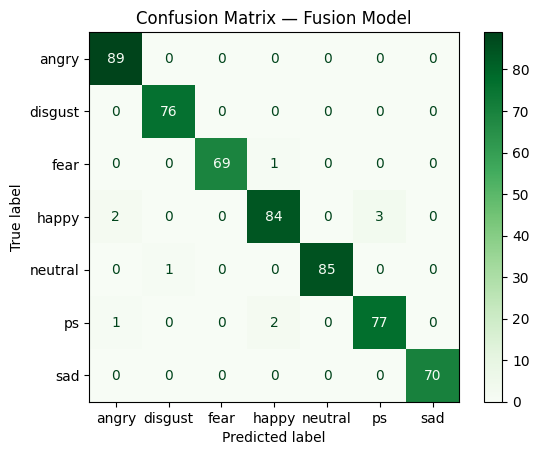

In [113]:
#confusion Matrix For Fusion Model
y_pred_fusion = model_fusion.predict(X_test_fusion)
y_pred_fusion = np.argmax(y_pred_fusion, axis=1)

cm_fusion = confusion_matrix(y_test, y_pred_fusion)

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_fusion,
                              display_labels=le.classes_)
disp.plot(cmap='Greens', values_format='d')

plt.title("Confusion Matrix — Fusion Model")
plt.show()

